# > **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href = '#quality'>Data Quality Issues</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

Data Dictionary
01 - PatientId
Identification of a patient
02 - AppointmentID
Identification of each appointment
03 - Gender
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
04 - DataMarcacaoConsulta
The day of the actuall appointment, when they have to visit the doctor.
05 - DataAgendamento
The day someone called or registered the appointment, this is before appointment of course.
06 - Age
How old is the patient.
07 - Neighbourhood
Where the appointment takes place.
08 - Scholarship
True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
09 - Hipertension
True or False
10 - Diabetes
True or False
Alcoholism
True or False
Handcap
True or False
SMS_received
1 or more messages sent to the patient.
No-show
True or False.

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


In [11]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


<a id = 'assessment'></a>
### Programmatic Assessment

In [3]:
df.shape

(110527, 14)

In [4]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id = 'quality'></a>
### Data Quality


* Spelling error for 'hipertension','handcap'.
* Change all column names to lowercase.
* Replace all occurrences of '-' with '\_' to maintain consistency.
* Change 'scheduledday' to a datetime object.
* Drop the two id columns.
* Remove all negative ages in the age column ,visualize to see and eliminate outliers.
* Check the metadata for description of the columns, specifically the 'handcap' column.
* Rename the **no_show** column __show__. Reverse the entries, with __no__ == 1 and __yes__ == 0.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

##### Drop the two id columns.

In [9]:
df = df.iloc[:,2:]
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


##### Change all column names to lowercase.

In [10]:
df.rename(columns = {x: x.lower() for x in df.columns},inplace = True)

##### Replace all occurrences of '-' with '_' to maintain consistency

In [11]:
df.rename(columns = {x : x.replace('-','_') for x in df.columns},inplace = True)

##### Correct Spelling error for 'hipertension','handcap'. Rename the no_show column show. 

In [12]:
df.rename(columns = {'hipertension':'hypertension','handcap':'handicap','no_show':'show'},inplace = True)

##### Change 'scheduledday'  and appointmentday columns to a datetime object.

In [23]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [24]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])

##### Reverse the entries in the show column, with no == 1 and yes == 0.

In [3]:
df['show'] = df.show.replace('No','show')
df['show'] = df.show.replace('Yes','no_show')

In [10]:
df.show.value_counts()

1    85307
0    21680
Name: show, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110527 non-null  object             
 1   scheduledday    110527 non-null  datetime64[ns, UTC]
 2   appointmentday  110527 non-null  datetime64[ns, UTC]
 3   age             110527 non-null  int64              
 4   neighbourhood   110527 non-null  object             
 5   scholarship     110527 non-null  int64              
 6   hypertension    110527 non-null  int64              
 7   diabetes        110527 non-null  int64              
 8   alcoholism      110527 non-null  int64              
 9   handicap        110527 non-null  int64              
 10  sms_received    110527 non-null  int64              
 11  show            110527 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(8), object(2)
memory usage: 9.3+ MB


##### Remove all negative ages in the age column ,visualize to see and eliminate outliers

In [17]:
df = df.query('age > 0')

In [18]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
count,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264,0.797359
std,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725,0.401969
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


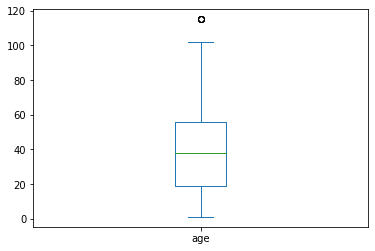

In [19]:
df.age.plot(kind = 'box');

In [38]:
df.handicap.value_counts()

0    104747
1      2041
2       183
3        13
4         3
Name: handicap, dtype: int64

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [21]:
df.to_csv('patients_appointments.csv',index = False)

In [2]:
df = pd.read_csv('patients_appointments.csv')
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1


In [24]:
df['show'] = df.show.replace(1,'show')
df['show'] = df.show.replace(0,'no_show')

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [25]:
new = df.neighbourhood.value_counts().to_frame()
new.columns = ['total_count']
new.head(2)
                      
                      

,total_count
JARDIM CAMBURI,7586
MARIA ORTIZ,5563


In [26]:
female = df.query('gender == "F" ')
male = df.query('gender == "M" ')

Simply classify the dataset into two distinct sections (male and female).

In [6]:
female.shape[0], male.shape[0]

(70118, 36869)

Apparently, there are nearly twice as much females as males. 

In [27]:
fem_nei = female.neighbourhood.value_counts().to_frame()
fem_nei.columns = ['female_count']
fem_nei.head(2)

,female_count
JARDIM CAMBURI,5074
MARIA ORTIZ,3616


This return the different neighborhoods in the dataset alongside the corresponding number of females assigned for an appointment in that neighborhood.

In [28]:
male_nei = male.neighbourhood.value_counts().to_frame()
male_nei.columns = ['male_count']
male_nei.head(2)
                                                    
                                                    
                                                    

,male_count
JARDIM CAMBURI,2512
MARIA ORTIZ,1947


This return the different neighborhoods in the dataset alongside the corresponding number of males assigned for an appointment in that neighborhood.

In [29]:
fem_male = fem_nei.merge(male_nei, left_on = fem_nei.index,right_on = male_nei.index)
fem_male.rename(columns ={'key_0':'neighbourhood'},inplace = True)
fem_male.set_index('neighbourhood',inplace = True)
fem_male


,female_count,male_count
neighbourhood,,
JARDIM CAMBURI,5074,2512
MARIA ORTIZ,3616,1947
RESISTÊNCIA,2817,1418
JARDIM DA PENHA,2652,1199
ITARARÉ,2218,1194
...,...,...
SEGURANÇA DO LAR,89,51
MORADA DE CAMBURI,64,30
PONTAL DE CAMBURI,46,23


The two datasets, __female_nei__ and __male_nei__, are merged into __fem_male__. 

In [30]:
fem_male.sort_values(['female_count','male_count'], ascending= False,inplace = True)
fem_male

,female_count,male_count
neighbourhood,,
JARDIM CAMBURI,5074,2512
MARIA ORTIZ,3616,1947
RESISTÊNCIA,2817,1418
JARDIM DA PENHA,2652,1199
ITARARÉ,2218,1194
...,...,...
SEGURANÇA DO LAR,89,51
MORADA DE CAMBURI,64,30
PONTAL DE CAMBURI,46,23


Sorting the data in descending order using the female_count and male_count columns. 

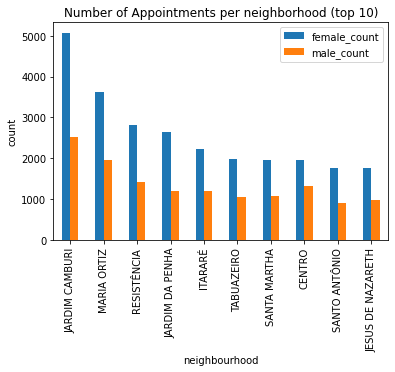

In [21]:
fem_male.head(10).plot(kind='bar',title = 'Number of Appointments per neighborhood (top 10)',ylabel = 'count');

Represented on the bar chart is the top ten neighborhoods with the most number of females and males assigned there for an appointment. As a result of there being more females than males in the dataset overall, the same status quo filters down to the the individual locations.

In [12]:
fem_male['female_percent'] = round((fem_male.female_count/(fem_male.female_count + fem_male.male_count))*100,2)

In [13]:
fem_male['male_percent'] = round((fem_male.male_count/(fem_male.female_count + fem_male.male_count))*100,2)

In [31]:
fe = female.groupby('neighbourhood')['show'].value_counts().unstack()

fe

show,no_show,show
neighbourhood,,
AEROPORTO,1.0,4.0
ANDORINHAS,337.0,1107.0
ANTÔNIO HONÓRIO,25.0,140.0
ARIOVALDO FAVALESSA,39.0,129.0
BARRO VERMELHO,61.0,235.0
...,...,...
SÃO JOSÉ,272.0,967.0
SÃO PEDRO,319.0,1167.0
TABUAZEIRO,360.0,1610.0


First, I groupby neighborhood column and then index the __show__ and then unstack all. This essentially returns the various locations alonside the corresponding number of females that showed up and did not show up for the scheduled appointment in that location. 

In [32]:
mal= male.groupby('neighbourhood')['show'].value_counts().unstack()

First, I groupby neighborhood column and then index the __show__ and then unstack all. This essentially returns the various locations alonside the corresponding number of males that showed up and did not show up for the scheduled appointment in that location. 

In [61]:
gef = fe.merge(mal, left_on = fe.index, right_on = mal.index)

__fe__ and __mal__ are both merged into __gef__

In [62]:
gef.rename(columns = {'key_0':'neighbourhood','no_show_x':'female(no_show)','show_x':'female(show)','no_show_y':'male(no_show)','show_y':'male(show)'},inplace = True)

Replace the non-descriptive columns with more descriptive ones.

In [63]:
# set the neighborhood column as the index.
gef.set_index('neighbourhood',inplace = True)

In [64]:
gef['female_show_pct'] = round((gef['female(show)']/(gef['female(show)'] + gef['female(no_show)']))*100,2)

To get a better understanding, a new column __female_show_pct__ shows the percentage of females that showed up at their various assigned location.  

In [65]:
gef['male_show_pct'] = round((gef['male(show)']/(gef['male(show)'] + gef['male(no_show)']))*100,2)

To get a better understanding, a new column __male_show_pct__ shows the percentage of males that showed up at their various assigned location.  

In [66]:
gef = gef.merge(new, left_on = gef.index, right_on = new.index)
gef.rename(columns = {'key_0':'neighbourhood'},inplace = True)
gef.set_index('neighbourhood',inplace = True)


This is simply a check to confirm that everything thing remains correct. I've merged __gef__ with __new__,which was created earlier, to confirm the totals. 

In [68]:
gef.sort_values('total_count',ascending= False, inplace = True)

Sort __gef__ in descending order using the __total__ column. 

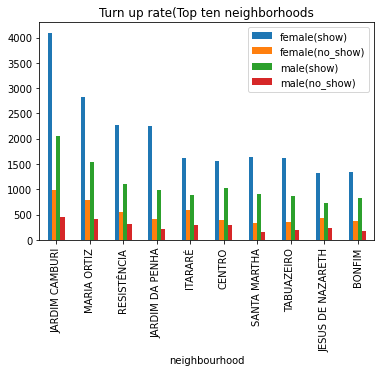

In [69]:
gef.head(10)[['female(show)','female(no_show)','male(show)','male(no_show)']].plot(kind = 'bar', title = 'Turn up rate(Top ten neighborhoods');



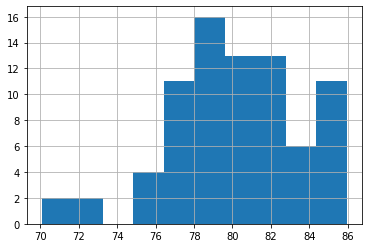

In [71]:
gef['female_show_pct'].hist();

Plotted on the histogram is the __female_show_pct__, which shows the percentage of females that showed up for their appointments. The turn up rate is really positive as least 70% of female patients always turn up for their appointments at their various locations. 

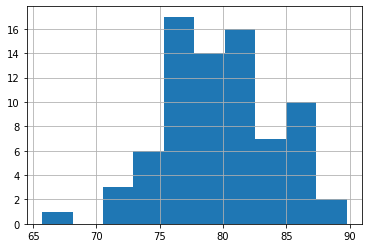

In [72]:
gef['male_show_pct'].hist();

Plotted on the histogram is the __male_show_pct__, which shows the percentage of males that showed up for their appointments. The turn up rate is really positive as least 65% of male patients always turn up for their appointments at their various locations. 

In [ ]:
df.age.

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [73]:
hyp = df.query('hypertension == 1')
hyp.head(2)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,show
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,show


Extracted into __hyp__ are patients suffering from hypertension. 

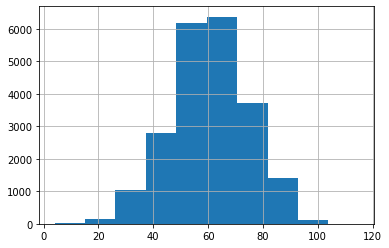

In [27]:
hyp.age.hist();

Apparently, most of the patients with hypertension are between 40 - 80, which makes sense. There are some outliers, but the histogram doesn't show them clearly.

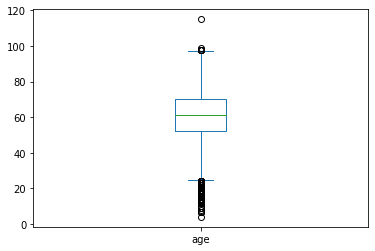

In [28]:
hyp.age.plot(kind = 'box');

The boxplot better visualizes the outliers. And we can see clearly that the are some patients under twenty, included in the dataset. Intuitively, this doesn't make sense, as young people hardly suffer from hypertension. 

In [29]:
hyp.age.describe()

count    21801.000000
mean        60.613596
std         13.929756
min          4.000000
25%         52.000000
50%         61.000000
75%         70.000000
max        115.000000
Name: age, dtype: float64

In [74]:
#calculating the upper and lower bounds so as to eliminate outliers
#Q3 - Q1 = interquartile range
#upper bound = q3 + (1.5 * interquartile range)
#lower bound = q1 - (1.5 * interquartile range)
upper_bound = 70 + (1.5 * 18)
lower_bound = 52 - (1.5 * 18)


In [31]:
lower_bound,upper_bound

(25.0, 97.0)

In [75]:
hyp = hyp.query(f'age > {lower_bound}')

Eliminate from __hyp__ patients that are less than 25 years old (the lower_bound).

##### Does 

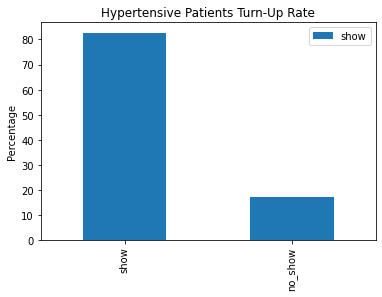

In [76]:
ax = (hyp.show.value_counts(normalize = True)*100).to_frame().plot(kind = 'bar',title = 'Hypertensive Patients Turn-Up Rate',ylabel = 'Percentage');


Apparently, more than 80% of patients with hypertension show up for their appointment. 

#### diabetes 

In [77]:
dia = df.query('diabetes == 1')
dia.head(2)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,show
36,F,2016-04-29 07:35:19+00:00,2016-04-29 00:00:00+00:00,63,SÃO CRISTÓVÃO,0,1,1,0,0,0,show


Extracted into __dia__ are patients suffering from diabetes. 

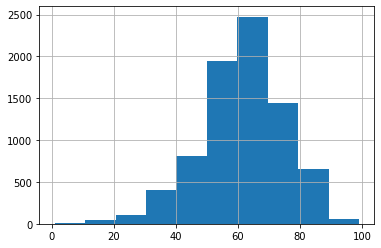

In [35]:
dia.age.hist();

Apparently, most of the patients with diabetes are between 45 - 80.

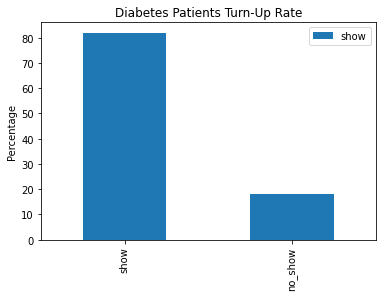

In [78]:
ax = (dia.show.value_counts(normalize = True)*100).to_frame().plot(kind = 'bar',title = 'Diabetes Patients Turn-Up Rate',ylabel = 'Percentage');


Apparently, more than 80% of patients with diabetes show up for their appointment.

## hyp vs dia

In [79]:
mix = hyp[['scheduledday','hypertension']].merge(dia[['gender','diabetes','show']],left_on = hyp.index, right_on = dia.index)               

__mix__ contains the patients with both diabetes and hypertension. 


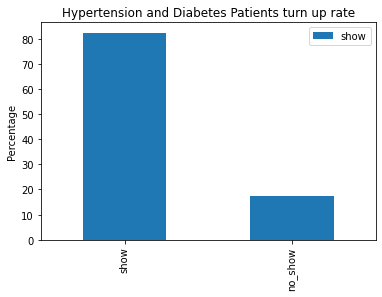

In [82]:
(mix.show.value_counts(normalize = True)*100).to_frame().plot(kind = 'bar',title = 'Hypertension and Diabetes Patients turn up rate',ylabel = 'Percentage');


More than 80% of patients suffering from both hypertension and diabetes showed up for their appointment. 

### Alcoholism 

In [83]:
alc = df.query('alcoholism == 1')

Data on alcoholic patients have been extracted.

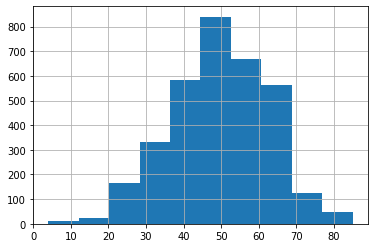

In [84]:
alc.age.hist();

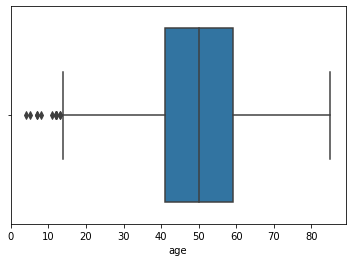

In [86]:
sns.boxplot(x = 'age', data = alc);

There less than 10 year olds tagged as alcoholics , they are outliers in the dataset and I'll take them out.

In [19]:
alc.age.describe()

count    3360.000000
mean       49.593750
std        12.707679
min         4.000000
25%        41.000000
50%        50.000000
75%        59.000000
max        85.000000
Name: age, dtype: float64

In [87]:
#calculating the upper and lower bounds so as to eliminate outliers
#Q3 - Q1 = interquartile range
#upper bound = q3 + (1.5 * interquartile range)
#lower bound = q1 - (1.5 * interquartile range)
lower_bound = 41 - (1.5 * 18)
lower_bound

14.0

In [88]:
alc = alc.query(f'age > {lower_bound}')

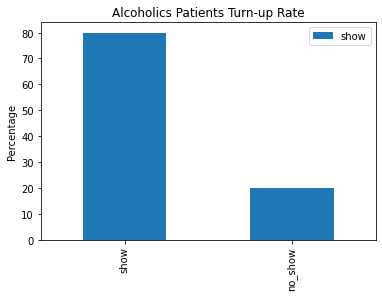

In [89]:
ax = (alc.show.value_counts(normalize = True) * 100).to_frame().plot(kind = 'bar',ylabel = 'Percentage',title = 'Alcoholics Patients Turn-up Rate');




Quite surprisingly, my initial intuition has been proved wrong as approximately 80% of patients that are alcoholics turned up for their appointment. 

In [24]:
round(alc.gender.value_counts(normalize = True) * 100,)

M    63.0
F    37.0
Name: gender, dtype: float64

Apparently, 63 percent of Alcoholic patients are male. 

### sms_received

In [96]:
sms = df.query('sms_received == 1')
sms.head(2)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
11,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,no_show
15,F,2016-04-26 08:47:27+00:00,2016-04-29 00:00:00+00:00,15,NOVA PALESTINA,0,0,0,0,0,1,show


Data on patients that got an sms, extracted.

array([<AxesSubplot:ylabel='show'>], dtype=object)

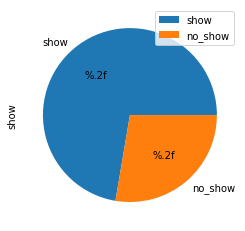

In [104]:
(sms.show.value_counts(normalize= True) * 100).to_frame().plot(kind = 'pie',subplots = True,autopct = '%%.2f')


The effect of an sms reminder is not massive as previous comparisms between the __show__ column and other variables have yielded a __"showed up" __ percentage higher than that of the __sms_received__ column and a __"no show"__ percentage lower than that of the __sms_received__ column. 

In [52]:
sms.neighbourhood.value_counts()

JARDIM CAMBURI       2526
MARIA ORTIZ          2029
RESISTÊNCIA          1432
JARDIM DA PENHA      1417
ITARARÉ              1128
                     ... 
MORADA DE CAMBURI      40
PONTAL DE CAMBURI      24
ILHA DO BOI             7
ILHA DO FRADE           6
AEROPORTO               1
Name: neighbourhood, Length: 79, dtype: int64

### How does the time difference between the appointment day and scheduled day affect the decision to send an sms reminder?

In [ ]:
sms['time_diff'] = sms.appointmentday - sms.scheduledday

Using the sliced dataset for all patients sent an sms reminder, I have created a __time_diff__ column to compute the difference between the appointment day and scheduled day. From this, I'll be able to extract the minimum amout of waiting for one to get an sms reminder.

In [27]:
sms.time_diff.min()

Timedelta('2 days 08:01:12')

Apparently, only those whose waiting time is more than two days get sms reminders

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

[NbConvertApp] WARNING | pattern 'Investigate_a_Dataset.ipynb' matched no files


This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

255